In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd

In [7]:
datafile = ('data/API_IT.NET.USER.ZS_DS2_en_csv_v2.csv')
shapefile = ('maps/ne_10m_admin_0_countries_lakes.shp')

bins = 9
cmap = 'Blues'
figsize = (16, 10)
year = '2016'
cols = ['Country Name', 'Country Code', year]
title = 'Individuals using the Internet (% of population) in {}'.format(year)
imgfile = 'img/{}.png'.format(''.join(title.split()))

descripton = '''
Individuals who have used the Internet from any location in the last 3 months via any device based on the International Telecommunication Union,
World Telecommunication/ICT Development Report and database. Data: World Bank - worldbank.org • Author: Ramiro Gómez - ramiro.org'''.strip()


In [8]:
gdf = gpd.read_file(shapefile)[['ADM0_A3', 'geometry']].to_crs('+proj=robin')
gdf.sample(5)

,ADM0_A3,geometry
150,MLT,(POLYGON ((1292877.524224813 3833653.303743897...
32,BOL,(POLYGON ((-6435727.460203339 -1730848.5173096...
233,TZA,(POLYGON ((3743544.209040124 -862619.887011656...
203,SLB,(POLYGON ((15841875.13047345 -1313896.45326346...
124,KNA,(POLYGON ((-5832012.889533965 1829372.13555681...


In [9]:
df = pd.read_csv(datafile, skiprows=4, usecols=cols)
df.sample(5)

,Country Name,Country Code,2016
127,Lao PDR,LAO,21.870000
76,Faroe Islands,FRO,95.108682
255,Vietnam,VNM,46.500000
98,Haiti,HTI,12.232602
136,Sri Lanka,LKA,32.051003


In [10]:
merged = gdf.merge(df, left_on='ADM0_A3', right_on='Country Code')
merged.describe()

,2016
count,201.000000
mean,51.524254
std,28.606108
min,1.177119
25%,25.366301
50%,54.000000
75%,76.176737
max,98.240016


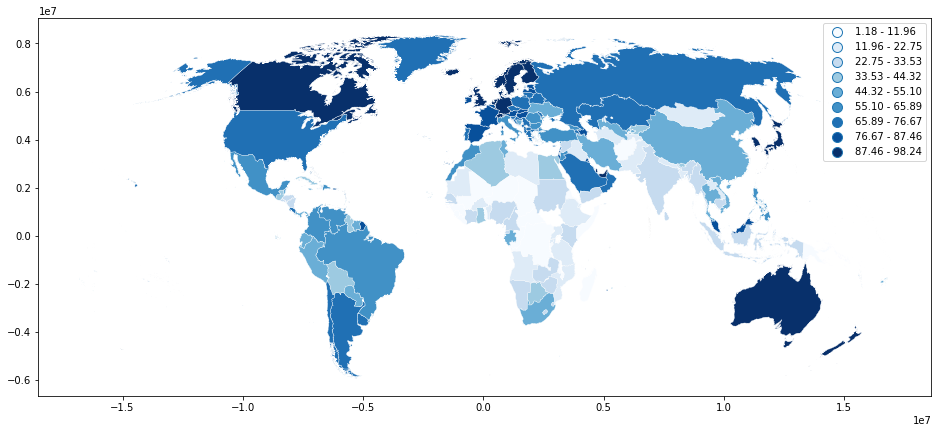

In [11]:
ax = merged.dropna().plot(column=year, cmap=cmap, figsize=figsize, scheme='equal_interval', k=bins, legend=True,linewidth=0.3, edgecolor='white')
ax

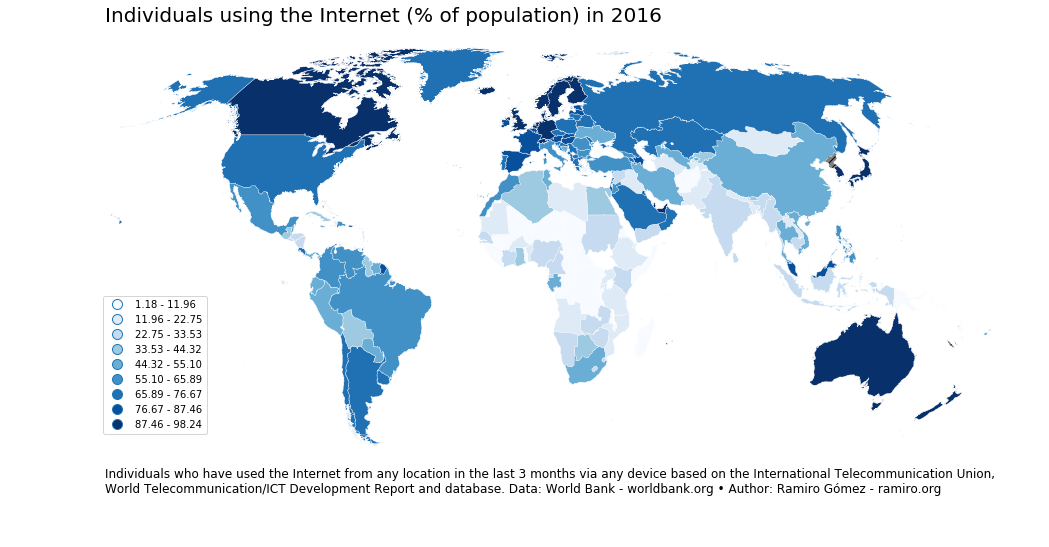

In [12]:
merged[merged.isna().any(axis=1)].plot(ax=ax, color='grey', hatch='///')

ax.set_title(title, fontdict={'fontsize': 20}, loc='left')
ax.annotate(descripton, xy=(0.1, 0.1), size=12, xycoords='figure fraction')

ax.set_axis_off()
ax.set_xlim([-1.5e7, 1.7e7])
ax.get_legend().set_bbox_to_anchor((.12, .4))
fig1 = ax.get_figure()

fig1.savefig('test.png', dpi=500)
fig1